In [1]:
import numpy as np
import matplotlib.pyplot as plt

**a)** Numerically solve system of two given ODEs using RK4. Plot with correct labels. Does steady state depend on initial conditions?

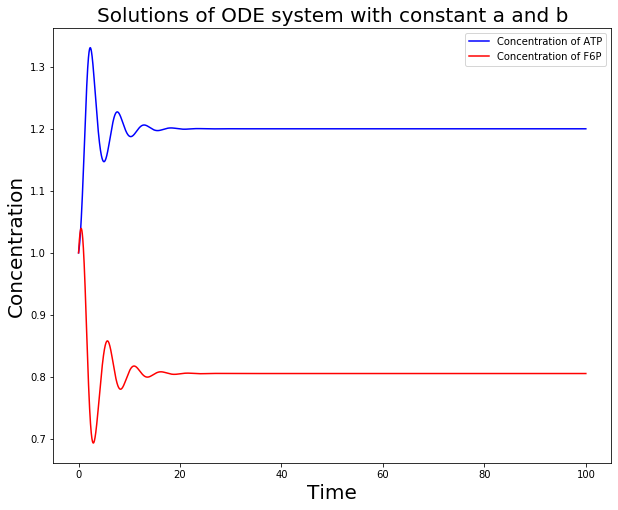

In [26]:
# Define the constants and the slope functions
a = 0.05
b=1.2

def f_ATP(t,c_ATP,c_F6P): return -c_ATP + a*c_F6P + c_ATP**2*c_F6P
def f_F6P(t,c_ATP,c_F6P): return b - a*c_F6P - c_ATP**2*c_F6P

# Define the time vector
h = 0.01
t = np.arange(0,100+h,h)

# Initialize vectors of solutions:
c_ATP = np.zeros(len(t))
c_F6P = np.zeros(len(t))

# Use initial conditions
c_ATP[0] = 1
c_F6P[0] = 1

# Solve using RK4 method
for i in range(len(t)-1): # Calculate next point, so don't go until last point
    # Slope k1 at left point
    kATP1 = f_ATP(t[i],c_ATP[i],c_F6P[i])
    kF6P1 = f_F6P(t[i],c_ATP[i],c_F6P[i])
    
    # Slope k2 at midpoint using k1
    kATP2 = f_ATP(t[i]+h/2, c_ATP[i]+h/2*kATP1, c_F6P[i]+h/2*kF6P1)
    kF6P2 = f_F6P(t[i]+h/2, c_ATP[i]+h/2*kATP1, c_F6P[i]+h/2*kF6P1)
    
    # Slope k3 at midpoint using k2
    kATP3 = f_ATP(t[i]+h/2, c_ATP[i]+h/2*kATP2, c_F6P[i]+h/2*kF6P2)
    kF6P3 = f_F6P(t[i]+h/2, c_ATP[i]+h/2*kATP2, c_F6P[i]+h/2*kF6P2)
    
    # Slope k4 at endpoint using k3
    kATP4 = f_ATP(t[i]+h, c_ATP[i]+h*kATP3, c_F6P[i]+h*kF6P3)
    kF6P4 = f_F6P(t[i]+h, c_ATP[i]+h*kATP3, c_F6P[i]+h*kF6P3)
    
    # average slopes:
    kATP = (kATP1 + 2*kATP2 + 2*kATP3 + kATP4)/6
    kF6P = (kF6P1 + 2*kF6P2 + 2*kF6P3 + kF6P4)/6
    
    # Calculate next point
    c_ATP[i+1] = c_ATP[i] + kATP*h
    c_F6P[i+1] = c_F6P[i] + kF6P*h

# Plot the solution
plt.figure(figsize=(10,8))
plt.plot(t,c_ATP,'b-',label='Concentration of ATP')
plt.plot(t,c_F6P,'r-',label='Concentration of F6P')
plt.xlabel('Time',size ='20')
plt.ylabel('Concentration',size ='20')
plt.legend()
plt.title('Solutions of ODE system with constant a and b',size ='20')
plt.savefig('A')
plt.show()


**b)** Usinf the same initial conditions and constant a, define an algebraic function for b=f(t) and solve again. Plot the results up to t=100.

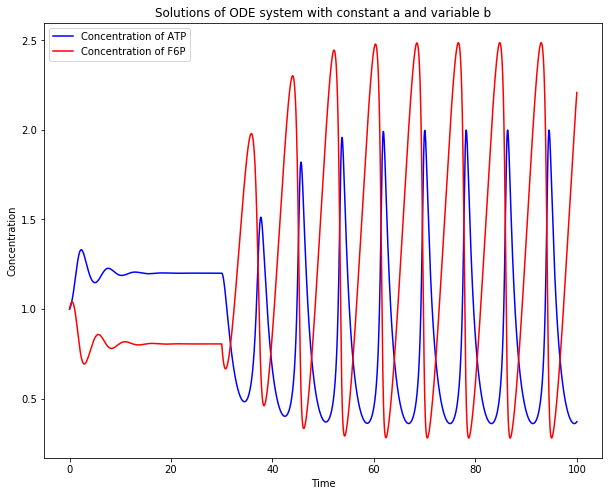

In [19]:
# Define a function for b
def b(t):
    if t<30.0:
        b = 1.2
    elif t>= 30.0:
        b = 0.8
    else:
        print('Error, time is smaller than 0.')
        return
    
    return b

# Redefine the functions using new b(t)
def f_ATP(t,c_ATP,c_F6P): return -c_ATP + a*c_F6P + c_ATP**2*c_F6P
def f_F6P(t,c_ATP,c_F6P): return b(t) - a*c_F6P - c_ATP**2*c_F6P

# Solve system again
# Initialize vectors of solutions:
c_ATPb = np.zeros(len(t))
c_F6Pb = np.zeros(len(t))

# Use initial conditions
c_ATPb[0] = 1
c_F6Pb[0] = 1

# Solve using RK4 method
for i in range(len(t)-1): # Calculate next point, so don't go until last point
    # Slope k1 at left point
    kATP1 = f_ATP(t[i],c_ATPb[i],c_F6Pb[i])
    kF6P1 = f_F6P(t[i],c_ATPb[i],c_F6Pb[i])
    
    # Slope k2 at midpoint using k1
    kATP2 = f_ATP(t[i]+h/2, c_ATPb[i]+h/2*kATP1, c_F6Pb[i]+h/2*kF6P1)
    kF6P2 = f_F6P(t[i]+h/2, c_ATPb[i]+h/2*kATP1, c_F6Pb[i]+h/2*kF6P1)
    
    # Slope k3 at midpoint using k2
    kATP3 = f_ATP(t[i]+h/2, c_ATPb[i]+h/2*kATP2, c_F6Pb[i]+h/2*kF6P2)
    kF6P3 = f_F6P(t[i]+h/2, c_ATPb[i]+h/2*kATP2, c_F6Pb[i]+h/2*kF6P2)
    
    # Slope k4 at endpoint using k3
    kATP4 = f_ATP(t[i]+h, c_ATPb[i]+h*kATP3, c_F6Pb[i]+h*kF6P3)
    kF6P4 = f_F6P(t[i]+h, c_ATPb[i]+h*kATP3, c_F6Pb[i]+h*kF6P3)
    
    # average slopes:
    kATP = (kATP1 + 2*kATP2 + 2*kATP3 + kATP4)/6
    kF6P = (kF6P1 + 2*kF6P2 + 2*kF6P3 + kF6P4)/6
    
    # Calculate next point
    c_ATPb[i+1] = c_ATPb[i] + kATP*h
    c_F6Pb[i+1] = c_F6Pb[i] + kF6P*h

# Plot the solution
plt.figure(figsize=(10,8))
plt.plot(t,c_ATPb,'b-',label='Concentration of ATP')
plt.plot(t,c_F6Pb,'r-',label='Concentration of F6P')
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.legend()
plt.title('Solutions of ODE system with constant a and variable b')
plt.show()

**c)** Adding one more ODE for b, solve the system now for 3 coupled equations. Plot up to t=200 with same a.

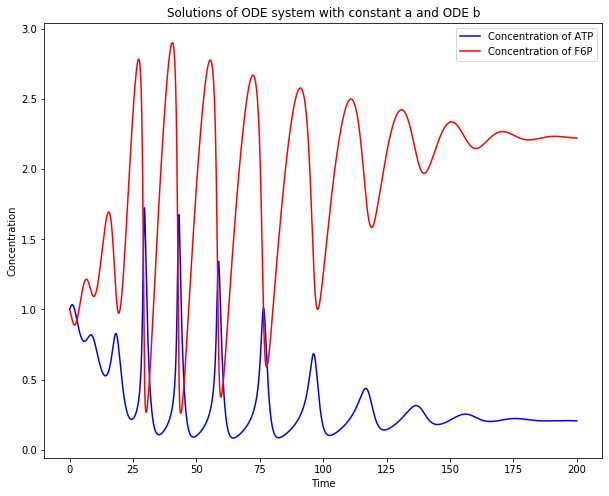

In [27]:
# Define functions, adding the ODE for b
def f_ATP(t,c_ATP,c_F6P,b): return -c_ATP + a*c_F6P + c_ATP**2*c_F6P
def f_F6P(t,c_ATP,c_F6P,b): return b - a*c_F6P - c_ATP**2*c_F6P
def f_b(t,c_ATP,c_F6P,b): return -0.1*c_F6P*c_ATP*np.exp(-1/b)

# Solve system again
# Define the time vector
t = np.arange(0,200+h,h)

# Initialize vectors of solutions:
c_ATPc = np.zeros(len(t))
c_F6Pc = np.zeros(len(t))
b = np.zeros(len(t))

# Use initial conditions
c_ATPc[0] = 1
c_F6Pc[0] = 1
b[0] = 1

# Solve using RK4 method
for i in range(len(t)-1): # Calculate next point, so don't go until last point
    # Slope k1 at left point
    kATP1 = f_ATP(t[i],c_ATPc[i],c_F6Pc[i],b[i])
    kF6P1 = f_F6P(t[i],c_ATPc[i],c_F6Pc[i],b[i])
    kb1 = f_b(t[i],c_ATPc[i],c_F6Pc[i],b[i])
    
    # Slope k2 at midpoint using k1
    kATP2 = f_ATP(t[i]+h/2, c_ATPc[i]+h/2*kATP1, c_F6Pc[i]+h/2*kF6P1, b[i]+h/2*kb1)
    kF6P2 = f_F6P(t[i]+h/2, c_ATPc[i]+h/2*kATP1, c_F6Pc[i]+h/2*kF6P1, b[i]+h/2*kb1)
    kb2 = f_b(t[i]+h/2, c_ATPc[i]+h/2*kATP1, c_F6Pc[i]+h/2*kF6P1, b[i]+h/2*kb1)
    
    # Slope k3 at midpoint using k2
    kATP3 = f_ATP(t[i]+h/2, c_ATPc[i]+h/2*kATP2, c_F6Pc[i]+h/2*kF6P2, b[i]+h/2*kb2)
    kF6P3 = f_F6P(t[i]+h/2, c_ATPc[i]+h/2*kATP2, c_F6Pc[i]+h/2*kF6P2, b[i]+h/2*kb2)
    kb3 = f_b(t[i]+h/2, c_ATPc[i]+h/2*kATP2, c_F6Pc[i]+h/2*kF6P2, b[i]+h/2*kb2)
    
    # Slope k4 at endpoint using k3
    kATP4 = f_ATP(t[i]+h, c_ATPc[i]+h*kATP3, c_F6Pc[i]+h*kF6P3, b[i]+h*kb3)
    kF6P4 = f_F6P(t[i]+h, c_ATPc[i]+h*kATP3, c_F6Pc[i]+h*kF6P3, b[i]+h*kb3)
    kb4 = f_b(t[i]+h, c_ATPc[i]+h*kATP3, c_F6Pc[i]+h*kF6P3, b[i]+h*kb3)
    
    # average slopes:
    kATP = (kATP1 + 2*kATP2 + 2*kATP3 + kATP4)/6
    kF6P = (kF6P1 + 2*kF6P2 + 2*kF6P3 + kF6P4)/6
    kb = (kb1 + 2*kb2 + 2*kb3 + kb4)/6
    
    # Calculate next point
    c_ATPc[i+1] = c_ATPc[i] + kATP*h
    c_F6Pc[i+1] = c_F6Pc[i] + kF6P*h
    b[i+1] = b[i] + kb*h

# Plot the solution
plt.figure(figsize=(10,8))
plt.plot(t,c_ATPc,'b-',label='Concentration of ATP')
plt.plot(t,c_F6Pc,'r-',label='Concentration of F6P')
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.legend()
plt.title('Solutions of ODE system with constant a and ODE b')
plt.show()